# Problem 1: Multiclass (30 %)
### So far we have largely focused on binary classification, where the input is a document and the output is a yes or a no (or probability of yes). 

### In fact, more complex tasks exist where the input is a document and the output can be multiple (more than two) classes. 

## In this problem we'll investigate two so-called multiclass problems
### Multiclass: an observation is assigned inclusion in ONE of a N $N>2$ categories
 - ### E.g. is this sentence positive, negative, or neutral sentiment
 - ### E.g. is this email spam or not spam


### Multiclass-multilabel: an observation can belong to more than one of $N>=2$ categories
 - ### E.g. is this document about `{sports, current events, Steph Curry}` ( a document can be about more than one)
 - ### E.g. is this blood sample A, B, O, $+$, $-$ (blood can be `A+` or `A-`)

## We will study the metrics we can use to evaluate these classification problems

In [1]:
import numpy as np
import pandas as pd
%pylab inline

import json

from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(1234)

## We will start with multiclass by studying the 20 newsgroups data
# $ \\ $
# $ \\ $
# Part 0: get the data
 - ### use the builtin function `from sklearn.datasets import fetch_20newsgroups`
 - ### NB: look at the docs and use the `remove` kwarg in order to get cleaned data

## TODO
 - ## fetch the data separately for the train and test data
 - ## How many classes are present? 
 - ## What is the most common class- please give the name and not the number.
 - ## What is the accuracy of the best constant guess in the train set?

In [3]:
from sklearn.datasets import fetch_20newsgroups


In [4]:
data_train = fetch_20newsgroups(...
data_test = fetch_20newsgroups(...



In [ ]:
val_counts = ...
print('found {} classes'.format(val_counts.shape[0]))
most_common_class = ...
print('most common class: {}'.format(most_common_class))

dummy_acc = accuracy_score(...
print('constant guess acc: {:.3f}'.format(dummy_acc))

# Part 1: fit a model
## As we saw with mnist, logistic regression is capable of fitting multi-class data.
 - ## Encode the text with as a bag of words and fit logistic regression to the data
 - ## Calcuate the out of sample accuracy score

In [6]:
# Todo
# 1. make a count vectorizer with max_features=20000
# 2. fit it
# 3. transform the train and test data into number
vec = ..

# your code here
xtr = ... # train data
xte = ... # test data


In [ ]:
# TODO
# 1. fit logistic regression
# 2. compute accuracy score

# your code here
accuracy_score(...

# Part 2: Evaluate metrics
### As we have seen previously, while accuracy is useful, it does not always capture all the behavior we want in a metric.

### Here we will extend the concept of f1 score to the multiclass setting. There are several ways to do this
 - report a different f1 score for every class (no averaging)
 - report the mean f1 score over all classes
 - report a weighted f1 score weighted by class prevelance. 

### For each of these three types of f1
 - calculate the score(s) without the help of scikit learn
 - compare it to the corresponding f1 score evaluated with scikit-learn (NB you'll need to read the docs for `f1_score`. 
 - Write down the pros and cons for this method of calculating multiclass f1 score

In [8]:
preds = lr.predict(xte)

f1s = []
for label_index, label_name in enumerate(data_train.target_names):
    # calculate the f1 score of one (label_index) vs rest
    # your code here...
    f1s.append(...

for label_name, fs in zip(data_train.target_names, f1s):
    print('fscore for {} \t = {:.3f}'.format(label_name, fs))

print('\n\n')
# compare to sklearn
success = (f1s == f1_score(data_test.target, preds, average=None)).all()
if success:
    print('sklearn builtin matches results')
else:
    print('scores do not match')

In [1]:
# The pros are ...
# The cons are ...

In [ ]:
# now the macro f1 (the mean of the f1s for each class)
f1_macro = ... # calculate without sklearn
f1_macro_sk = f1_score(... # calculate with sklearn
assert(f1_macro == f1_macro_sk)
print('macro f1: {} \t sklearn macro f1 {}'.format(
    f1_macro, 
    f1_macro_sk
))



In [ ]:
# The pros are ...
# The cons are ...

In [ ]:
# now weighted by class prevalence
# TODO:
#  - calculate the frequency of each class
#  - take a weighted average of the f1s, weighted by these weights
#  - compare to sklearn
wts = ...
weighted_f1 = # without sklearn
weighted_f1_sk = f1_score(... # with sklearn

print('weighted f1 {} \t sklearn weighted f1 {}'.format(weighted_f1, weighted_f1_sk))



In [ ]:
# The pros are ...
# The cons are ...

# Part 3: Confusion Matrix
## The confusion matrix is a handy way to understand errors in classification problems.  It is a 2-D grid of what values were predicted and what the actual values were. 

See [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) in the sklearn docs. 

## Create a confusion matrix for the 20-newsgroups dataset and comment on the most common failure modes

In [3]:
from sklearn.metrics import confusion_matrix
# your code here
# NB: it's handy to call `pd.DataFrame` on the confusion matrix to print it out nicely

In [4]:
# comments here

# Problem 2: Multiclass Multilabel Problems (20 %)
### In this problem we'll examine academic articles from the [arXiv](www.arxiv.org).
### Authors who submit articles can attach one or more categories to the articles

# Part 0: Load the data
## TODO
 - ### load the data
 - ### compute all of the unique categories in the train data
 - ### What are the 10 most common categories which occur together

In [3]:
with open('./data/arXiv/arxiv-qfin-train.json') as fi:
    data_train = json.load(fi)

with open('./data/arXiv/arxiv-qfin-test.json') as fi:
    data_test = json.load(fi)

    
print(len(data_train), len(data_test))

9923 2481


In [4]:
data_train[1]

{'title': 'Identifying long-term precursors of financial market crashes using\n  correlation patterns',
 'summary': 'The study of the critical dynamics in complex systems is always interesting\nyet challenging. Here, we choose financial market as an example of a complex\nsystem, and do a comparative analyses of two stock markets - the S&P 500 (USA)\nand Nikkei 225 (JPN). Our analyses are based on the evolution of\ncrosscorrelation structure patterns of short time-epochs for a 32-year period\n(1985-2016). We identify "market states" as clusters of similar correlation\nstructures, which occur more frequently than by pure chance (randomness). The\ndynamical transitions between the correlation structures reflect the evolution\nof the market states. Power mapping method from the random matrix theory is\nused to suppress the noise on correlation patterns, and an adaptation of the\nintra-cluster distance method is used to obtain the "optimum" number of market\nstates. We find that the USA is 

In [6]:
# compute the unique categories here
set_cat = set()
for val in data_train:
    for cat in val['category']:
        set_cat.add(cat)
        
print(set_cat)
len(set_cat)

{'econ.EM', 'q-fin.TR', 'q-fin.RM', 'q-fin.GN', 'q-fin.CP', 'q-fin.ST', 'q-fin.PR', 'q-fin.MF', 'math.PR', 'q-fin.PM', 'econ.GN', 'q-fin.EC'}


12

In [7]:
# compute the co-occuring categories here
# Hint:
#  - loop through all the train articles
#  - loop through all the pairs of categories
#  - keep track of the counts of every pair
dict_cat = {}
for val in data_train:
    if len(val['category'])>1:
        if str(sorted(val['category'])) in dict_cat:
            dict_cat[str(sorted(val['category']))] += 1
        else:
            dict_cat[str(sorted(val['category']))] = 1


sorted_dict = {k: v for k, v in sorted(dict_cat.items(), key=lambda item: item[1], reverse=True)}
dict(list(sorted_dict.items())[0:10])

{"['econ.GN', 'q-fin.EC']": 795,
 "['math.PR', 'q-fin.PR']": 281,
 "['math.PR', 'q-fin.MF']": 160,
 "['q-fin.CP', 'q-fin.PR']": 130,
 "['q-fin.ST', 'q-fin.TR']": 117,
 "['math.PR', 'q-fin.RM']": 113,
 "['math.PR', 'q-fin.CP']": 112,
 "['q-fin.GN', 'q-fin.ST']": 98,
 "['q-fin.RM', 'q-fin.ST']": 82,
 "['q-fin.PM', 'q-fin.RM']": 72}

# Part 1: Encode the data

## We will encode the title of each article using a bag of words (`CountVectorizer`). Try limiting the features to about 20k. 

## Encoding targets is as bit trickier for multilabel problems. In this case we want our target to be a matrix of $N_{samples} x N_{categories}$ but each row does not have to sum to 1.
 - ## NB: scikit learn as a `MultiLabelBinarizer` to help here. 

# $ \\ $
## TODO
 - ## fit a `CountVectorizer` on the titles to create `x_train` and `x_test`
 - ## create `y_train` and `y_test` to be matrices of $N_{samples} x N_{categories}$ with all 0s and 1s

In [8]:
d_train_summ = [item['summary'] for item in data_train]
d_test_summ = [item['summary'] for item in data_test]
d_train_cat = [sorted(item['category']) for item in data_train]
d_test_cat = [sorted(item['category']) for item in data_test]

In [9]:
d_train_cat

[['q-fin.CP'],
 ['q-fin.ST'],
 ['q-fin.ST'],
 ['q-fin.GN'],
 ['econ.GN', 'q-fin.EC'],
 ['math.PR', 'q-fin.PR'],
 ['econ.GN', 'q-fin.EC'],
 ['q-fin.CP', 'q-fin.MF', 'q-fin.ST'],
 ['q-fin.MF'],
 ['q-fin.TR'],
 ['math.PR', 'q-fin.RM'],
 [],
 ['q-fin.ST'],
 ['q-fin.GN'],
 ['q-fin.MF'],
 ['math.PR', 'q-fin.PM', 'q-fin.RM'],
 [],
 ['q-fin.CP'],
 ['q-fin.PR'],
 ['math.PR', 'q-fin.PM'],
 ['econ.EM'],
 ['q-fin.MF'],
 ['q-fin.GN'],
 ['q-fin.PM'],
 ['q-fin.EC'],
 ['q-fin.TR'],
 ['q-fin.MF', 'q-fin.TR'],
 ['math.PR', 'q-fin.ST'],
 ['q-fin.ST'],
 ['math.PR', 'q-fin.MF'],
 ['q-fin.ST'],
 ['econ.EM'],
 ['q-fin.TR'],
 ['q-fin.PR'],
 ['math.PR', 'q-fin.PR'],
 ['q-fin.GN'],
 ['math.PR', 'q-fin.MF', 'q-fin.RM'],
 ['q-fin.TR'],
 ['econ.GN', 'q-fin.EC'],
 ['q-fin.GN', 'q-fin.ST'],
 ['q-fin.CP', 'q-fin.ST'],
 [],
 ['q-fin.PM'],
 ['q-fin.TR'],
 ['econ.EM', 'q-fin.PM', 'q-fin.RM'],
 ['math.PR', 'q-fin.MF'],
 ['q-fin.ST'],
 ['q-fin.PM'],
 ['econ.GN', 'q-fin.EC'],
 ['q-fin.GN'],
 ['q-fin.GN', 'q-fin.ST'],
 ['q-

In [10]:
vec = CountVectorizer(lowercase=False)
vec.fit(d_train_summ)
x_train = vec.transform(d_train_summ)
x_test = vec.transform(d_test_summ)

In [102]:
x_train

<9923x28496 sparse matrix of type '<class 'numpy.int64'>'
	with 873196 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
# your code here
mlb.fit(d_train_cat)
y_train = mlb.transform(d_train_cat)
y_test = mlb.transform(d_test_cat)
print(y_train.shape, y_test.shape)
print(list(mlb.classes_))
x_train

(9923, 12) (2481, 12)
['econ.EM', 'econ.GN', 'math.PR', 'q-fin.CP', 'q-fin.EC', 'q-fin.GN', 'q-fin.MF', 'q-fin.PM', 'q-fin.PR', 'q-fin.RM', 'q-fin.ST', 'q-fin.TR']


<9923x28496 sparse matrix of type '<class 'numpy.int64'>'
	with 873196 stored elements in Compressed Sparse Row format>

## Part 2: Model the data
### While scikit-learn can't handle multilabel data in logistic regression, keras can. 
### Create and fit a multilabel logistic regression model and fit it. 
### NB: think hard about the activation function and loss function that are appropriate in this case!

In [12]:
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout
import keras.backend as K

K.clear_session()
doc_input = Input(shape=(x_train.shape[1],))
output = Dense(len(mlb.classes_), activation='sigmoid')(doc_input)
# your code here
# dont forget to compile your model
model = Model(doc_input, output)
model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['accuracy']
)

Using TensorFlow backend.


In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28496)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                341964    
Total params: 341,964
Trainable params: 341,964
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train, y_train, batch_size=512, epochs=10, shuffle=True)

Epoch 1/10
9923/9923 [==============================] - 2s 250us/step - loss: 0.1460 - accuracy: 0.2032
Epoch 2/10
9923/9923 [==============================] - 2s 198us/step - loss: 0.1017 - accuracy: 0.3082
Epoch 3/10
9923/9923 [==============================] - 2s 197us/step - loss: 0.0933 - accuracy: 0.3256
Epoch 4/10
9923/9923 [==============================] - 2s 201us/step - loss: 0.0854 - accuracy: 0.4180
Epoch 5/10
9923/9923 [==============================] - 2s 197us/step - loss: 0.0778 - accuracy: 0.4872
Epoch 6/10
9923/9923 [==============================] - 2s 198us/step - loss: 0.0715 - accuracy: 0.5302
Epoch 7/10
9923/9923 [==============================] - 2s 201us/step - loss: 0.0663 - accuracy: 0.5528
Epoch 8/10
9923/9923 [==============================] - 2s 198us/step - loss: 0.0619 - accuracy: 0.56690s - loss: 0.0626 - ac
Epoch 9/10
9923/9923 [==============================] - 2s 198us/step - loss: 0.0583 - accuracy: 0.5838
Epoch 10/10
9923/9923 [===================

<AxesSubplot:>

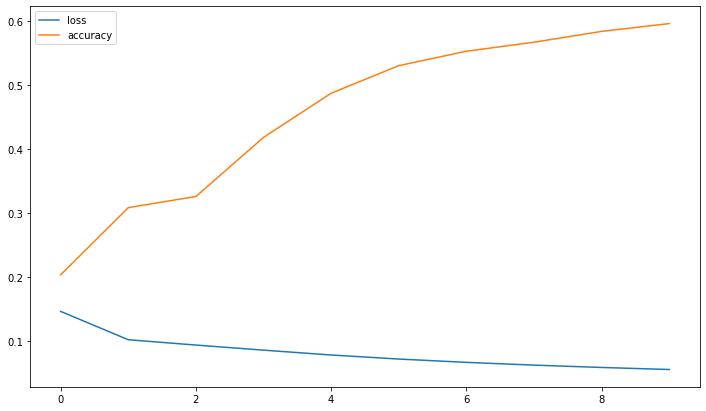

In [15]:
pd.DataFrame(model.history.history).plot(#[['val_loss', 'val_accuracy']]
    figsize=(12,7), secondary_y='val_loss'
)

# Part 3: f1 score
## While modeling is more difficult in the multilabel case, the metrics are, oddly, simpler. Here, we can only compute metrics class by class.

### For each class, print the accuracy and f1 score for the class. Comment on the results. 

In [16]:
preds = model.predict(x_test)
for i, class_ in enumerate(mlb.classes_):
    acc = accuracy_score(y_test[:, i].astype(numpy.float32), preds[:, i].round())
    f1 = f1_score(y_test[:, i].astype(numpy.float32), preds[:, i].round())
    print('class{} \t\tacc: {:.3f} \tf1: {:.3f}'.format(class_, acc, f1))

classecon.EM 		acc: 0.944 	f1: 0.668
classecon.GN 		acc: 0.942 	f1: 0.549
classmath.PR 		acc: 0.907 	f1: 0.416
classq-fin.CP 		acc: 0.916 	f1: 0.376
classq-fin.EC 		acc: 0.919 	f1: 0.570
classq-fin.GN 		acc: 0.863 	f1: 0.452
classq-fin.MF 		acc: 0.894 	f1: 0.070
classq-fin.PM 		acc: 0.925 	f1: 0.413
classq-fin.PR 		acc: 0.913 	f1: 0.559
classq-fin.RM 		acc: 0.921 	f1: 0.467
classq-fin.ST 		acc: 0.892 	f1: 0.701
classq-fin.TR 		acc: 0.936 	f1: 0.418


In [17]:
accuracy_score(y_test[:,1].astype(numpy.float64),preds[:,1].round())

0.9423619508262797

In [18]:
np.array([0.2, 0.6, 3, 4, 5]).round()

array([0., 1., 3., 4., 5.])

# Problem 3: New Metrics (30%)
## In this problem we'll explore new metrics associated with true positives and false positives.

## Part 0: Load the IMDB data and fit a model
 - ### Load the imdb data
 - ### featurize the text using TFIDF
 - ### Fit logistic regression
 - ### calculate the in-sample and out of sample accuracy and f1 score

In [16]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline


def load_imdb_data_text(imdb_data_dir, random_seed=1234):
    train_dir = os.path.join(imdb_data_dir, 'train')
    test_dir = os.path.join(imdb_data_dir, 'test')

    np.random.seed(random_seed)
    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(train_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    train_docs = texts
    y_train = np.array(targets)


    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(test_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    test_docs = texts
    y_test = np.array(targets)

    inds = np.arange(y_train.shape[0])
    np.random.shuffle(inds)

    train_docs = [train_docs[i] for i in inds]
    y_train = y_train[inds]
    
    return (train_docs, y_train), (test_docs, y_test)

(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text('../../data/aclImdb/')
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

Populating the interactive namespace from numpy and matplotlib
found 25000 train docs and 25000 test docs


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
vec = TfidfVectorizer...
# more code here


# more code here
preds_train = ...
preds_test = ...

print('#'*20 + ' in sample ' + '#'*20 )
print('\t\taccuracy: {:.3f}'.format(accuracy_score(y_train, preds_train)))
print('\t\tf1: {:.3f}'.format(f1_score(y_train, preds_train)))
print('\n\n')
print('#'*20 + ' out of sample ' + '#'*20 )
print('\t\taccuracy: {:.3f}'.format(accuracy_score(y_test, preds_test)))
print('\t\tf1: {:.3f}'.format(f1_score(y_test, preds_test)))

## Part 2: Tradeoff between true positives and false positives
Typically we take a threshold of 0.5 probability to consider something a positive example.
However, as we change this threshold we can change the number of true positives we get.
 - Example: at a theshold of 0.0001 we will get nearly all of the true positives
 - Example: at a threshold of 0.999 we will get almost none of the true positives

Notice: as we change our threshold and increase the number of true positives we will also increase the number of false positives we pick up.

In this part you will create a graph of the false positive rate on the x-axis and the true positive rate on the y-axis. This is often called the `receiver operator characteristic`. Make this curve for the out of sample data below.

Note: while you can use the builtin scikit-learn functionality for this, you will __not receive credit__ if you do. 

In [17]:
from tqdm import tqdm


In [ ]:
# your code here
# hint: 
#  - loop through the thresholds
#  - calulcate the true positives and false positives

# hint: what values for thresholds should you loop through?

In [ ]:
pd.Series(true_pos_rates, index=false_pos_rates).plot(figsize=(12,8), fontsize=16)
plt.xlabel('False Pos Rate', fontsize=16)
plt.ylabel('True Pos Rate', fontsize=16)
plt.title('Receiver Operator Characteristic', fontsize=20)

## Part 3: Baseline
 - What does the receiver operator curve look like for a random guessing classifier? 
 - Make the same plot as above but add the random guessing curve
 - Add comments about WHY the random guessing curve looks this way

In [ ]:
ax = pd.Series(true_pos_rates, index=false_pos_rates, name='logistic regression').plot(
    figsize=(12,8), fontsize=16
)
baseline_series = ... # your code here for the ROC for random guessing
baseline_series.to_frame('random guess').plot(ax=ax, fontsize=16)
plt.xlabel('False Pos Rate', fontsize=16)
plt.ylabel('True Pos Rate', fontsize=16)
plt.title('Receiver Operator Characteristic', fontsize=20)
plt.legend(fontsize=16)

In [38]:
# add comments here

## Part 4: Boiling it down to a single number
 - While the ROC is a useful curve and contains a lot of information, it is useful to distill in down to a single number. Typically, the area under the curve is used. Calculate the area under the curve and add it as the title to your previous plot. 
 - Hint: think about approximations for integrals for finding area under a curve


In [ ]:
area_under = # your code here


# repeat the plotting code here

plt.title('Area under the curve = {:.3f}'.format(area_under, fontsize=20))
plt.legend(fontsize=16)

## Part 5: Check you work and comment on the results
 - "There's gotta be a better way!"
 - In fact, `scikit-learn` will take care of a lot of the headache here. 
 - `from sklearn.metrics import plot_roc_curve`
 - read the docs and use this function



In [ ]:
from sklearn.metrics import plot_roc_curve, auc
# your code here

## A few comments:
 - The area under the ROC has a nice interpretation. It can be thought of as the probability that a randomly chosen positive example has a higher probability than a randomly chosen negative example.
 - This metric is also nice since it is independent of a threshold. 

# Problem 4: Examining Coefficients (20%)
In class we skipped an important step: we never made sure our models made sense. 
Logistic regression provides coefficients, which allow us to determine if a model
if learning anything reasonable. 

In this problem, you'll load the imdb data, fit logistic regression and exmamine the coefficients. 
Print out the largest and smallest (largest negative) coefficients and comment on the results.

In [20]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

def load_imdb_data_text(imdb_data_dir, random_seed=1234):
    train_dir = os.path.join(imdb_data_dir, 'train')
    test_dir = os.path.join(imdb_data_dir, 'test')

    np.random.seed(random_seed)
    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(train_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename,'r', encoding='UTF-8') as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    train_docs = texts
    y_train = np.array(targets)


    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(test_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename,'r', encoding='UTF-8') as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    test_docs = texts
    y_test = np.array(targets)

    inds = np.arange(y_train.shape[0])
    np.random.shuffle(inds)

    train_docs = [train_docs[i] for i in inds]
    y_train = y_train[inds]
    
    return (train_docs, y_train), (test_docs, y_test)


Populating the interactive namespace from numpy and matplotlib


In [230]:
(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text('./data/aclImdb/')
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

found 25000 train docs and 25000 test docs


In [239]:
train_docs[2]

'Michael Winner is probably best known for his revenge-themed films, such as "Death Wish" and "Chato\'s Land", but he is equally gifted as a director of occult Horror cinema, as "The Sentinel" of 1977 proves. "The Sentinel", which is based on a novel by John Konvitz, who also wrote the screenplay, is a clever and immensely creepy religious chiller that no lover of occult Horror should consider missing. The film is obviously inspired by successful occult classics such as "Rosemary\'s Baby", "The Exorcist" or "The Omen", but, as far as I am concerned, it is also easily as unsettling as these more widely acclaimed films, and probably even creepier.<br /><br />Allison Parker (Christina Raines) is a beautiful young New York model. Traumatized by events in her her past and not yet willing to marry her lawyer boyfriend (Chris Sarandon), Allison is in search for an apartment, and finds a big, incredibly nice one, which is also affordable, in an old mansion in Brooklyn. The new apartment, howev

In [24]:
%store train_docs

Stored 'train_docs' (list)


In [233]:
%store y_train

Stored 'y_train' (ndarray)


In [234]:
%store test_docs

Stored 'test_docs' (list)


In [235]:
%store y_test

Stored 'y_test' (ndarray)


In [23]:
%store -r train_docs
%store -r y_train
%store -r test_docs
%store -r y_test

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vec = TfidfVectorizer(lowercase=True, max_features=10000)
x_train = vec.fit_transform(thing for thing in train_docs)
x_test = vec.fit_transform(thing for thing in test_docs)
# more code here
                      
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

test_preds = lr.predict(x_test)


In [36]:
accuracy_score(y_test, test_preds)

0.53296

In [37]:
coef = np.squeeze(lr.coef_)

In [38]:
x_train.todense().shape

(25000, 10000)

In [308]:
# Hint: you can call `vec.get_feature_names` to get the words in order
# that correspond to the columns of the TFIDF matrix 
# This is useful to pass to the index of a pd.Series

In [39]:
word = vec.get_feature_names()

In [40]:
coefs = pd.DataFrame({'coef': coef, 'token': word}, columns=['coef', 'token']).sort_values(by='coef', ascending=False)

# NB: to get the largest items in a series by abs try
#coefs.loc[coefs.abs().nlargest(20).index]

In [41]:
coefs.head(20)

,coef,token
3997,7.066042,grow
3209,6.072309,existenz
988,4.932215,biggest
6553,4.835743,phase
9877,4.604285,wonder
439,4.043686,ambitious
9743,3.772415,weber
9091,3.753873,tits
3406,3.675948,female
5397,3.671688,lush


In [42]:
coefs.tail(20)

,coef,token
2647,-3.658181,displayed
2648,-3.697428,displaying
7499,-3.740254,ridley
7807,-3.762265,scum
8633,-3.765571,subjected
514,-3.847381,anti
6106,-4.087997,noteworthy
9378,-4.100726,unexpected
4384,-4.196183,humor
2865,-4.258127,earliest


In [9]:
# comments here
# it makes sense that the words such as worse, tepid, worry, unexpected are shown in the largest negative coefficients, since these words are all negative words.
# However, it seems the positive words do not work very well, probably because the result is not very accurate in the first place.